<a href="https://colab.research.google.com/github/balohuss/balohuss/blob/main/RegressionModelOnPM25AirDataInJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install py-openaq

  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=c9c5e08f30c8487f148884b4fbb3ce26181b9652e497bf4d3982bae677b4f5f9
  Stored in directory: /root/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [3]:
#API dataset library
import openaq
#data analysis and visualisation libraries
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



In [4]:
# Generate data
api=openaq.OpenAQ()
res = api.measurements(city='Jackson', parameter='pm10', limit=2500, df=True)

/usr/local/lib/python3.7/dist-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [5]:
res.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2022-03-09 12:00:00,Jackson NCORE,pm10,7,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 18:00:00+00:00,32.329042,-90.182659
2022-03-09 11:00:00,Jackson SLAMS,pm10,2,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 18:00:00+00:00,43.457764,-110.797994
2022-03-09 11:00:00,Jackson NCORE,pm10,6,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 17:00:00+00:00,32.329042,-90.182659
2022-03-09 10:00:00,Jackson NCORE,pm10,5,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 16:00:00+00:00,32.329042,-90.182659
2022-03-09 09:00:00,Jackson SLAMS,pm10,4,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 16:00:00+00:00,43.457764,-110.797994


In [6]:
res.dtypes

location                              object
parameter                             object
value                                  int64
unit                                  object
country                               object
city                                  object
date.utc                 datetime64[ns, UTC]
coordinates.latitude                 float64
coordinates.longitude                float64
dtype: object

In [8]:
res['date_ordinal'] = pd.to_datetime(res['date.utc']).apply(lambda datetime: datetime.toordinal())

In [9]:
res.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,date_ordinal
date.local,,,,,,,,,,
2022-03-09 12:00:00,Jackson NCORE,pm10,7,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 18:00:00+00:00,32.329042,-90.182659,738223
2022-03-09 11:00:00,Jackson SLAMS,pm10,2,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 18:00:00+00:00,43.457764,-110.797994,738223
2022-03-09 11:00:00,Jackson NCORE,pm10,6,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 17:00:00+00:00,32.329042,-90.182659,738223
2022-03-09 10:00:00,Jackson NCORE,pm10,5,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 16:00:00+00:00,32.329042,-90.182659,738223
2022-03-09 09:00:00,Jackson SLAMS,pm10,4,b'\xc2\xb5g/m\xc2\xb3',US,Jackson,2022-03-09 16:00:00+00:00,43.457764,-110.797994,738223


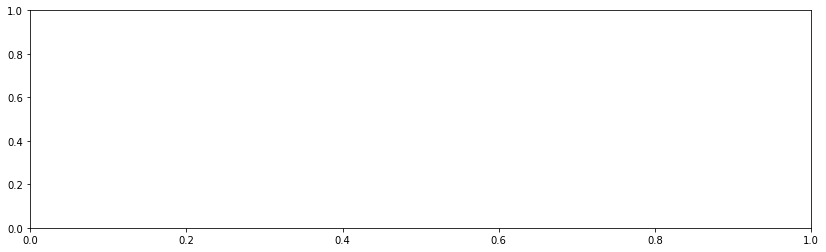

In [10]:
fig, ax = plt.subplots(1, figsize=(14, 4))

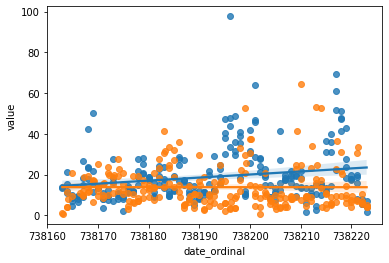

In [11]:
for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to 6 hour intervals
        _df = df.query("value >= 0.0").resample('6h').mean()
        xval = 'date_ordinal'
        yval = 'value'
        ax = sns.regplot(
            x = xval,
            y = yval,
            data=_df,
            label=group
            )

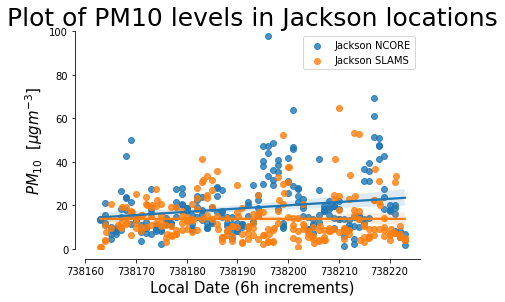

In [13]:
for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to 6 hour intervals
        _df = df.query("value >= 0.0").resample('6h').mean()
        xval = 'date_ordinal'
        yval = 'value'
        ax = sns.regplot(
            x = xval,
            y = yval,
            data=_df,
            label=group
            )
# plot customisation  
ax.legend(loc='best')
ax.set_ylim([0, 100])
ax.set_ylabel("$PM_{10}$  [$\mu g m^{-3}$]", fontsize=15)
ax.set_xlabel("Local Date (6h increments)", fontsize=15)
ax.set_title("Plot of PM10 levels in Jackson locations",  fontsize=25)
sns.despine(offset=10)
#plt.legend(labels=["Hinds CC","Jackson","Jackson NCORE","Jackson SLAMS"], title="LOCATIONS", fontsize="medium", title_fontsize="10")
plt.show()    


In [18]:
# Tighten up the axes for prettiness
ax.set_xlim(df['date_ordinal'].min() - 1, df['date_ordinal'].max() + 1)
ax.set_ylim(0, df['value'].max() + 1)

(0.0, 97.0)

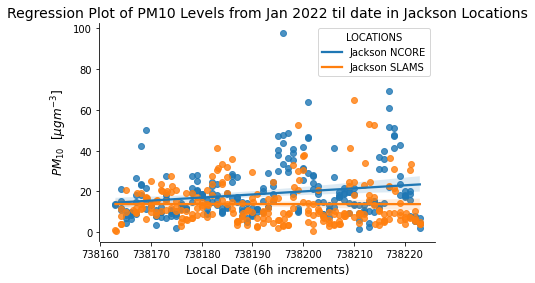

In [33]:
for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to 6 hour intervals
        _df = df.query("value >= 0.0").resample('6h').mean()
        xval = 'date_ordinal'
        yval = 'value'
        ax = sns.regplot(
            x = xval,
            y = yval,
            data=_df,
            )
# plot customisation  
ax.set_ylabel("$PM_{10}$  [$\mu g m^{-3}$]", fontsize=12)
ax.set_xlabel("Local Date (6h increments)", fontsize=12)
ax.set_title("Regression Plot of PM10 Levels from Jan 2022 til date in Jackson Locations",  fontsize=14)
sns.despine(offset=1)
plt.legend(labels=["Jackson NCORE","Jackson SLAMS"], title="LOCATIONS",loc="best", fontsize="medium", title_fontsize="10")
plt.show()

In [39]:
#ax.set_xlabel('date')
new_labels = [datetime.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

[Text(738160.0, 0, '2022-01-05 00:00:00'),
 Text(738170.0, 0, '2022-01-15 00:00:00'),
 Text(738180.0, 0, '2022-01-25 00:00:00'),
 Text(738190.0, 0, '2022-02-04 00:00:00'),
 Text(738200.0, 0, '2022-02-14 00:00:00'),
 Text(738210.0, 0, '2022-02-24 00:00:00'),
 Text(738220.0, 0, '2022-03-06 00:00:00'),
 Text(738230.0, 0, '2022-03-16 00:00:00')]

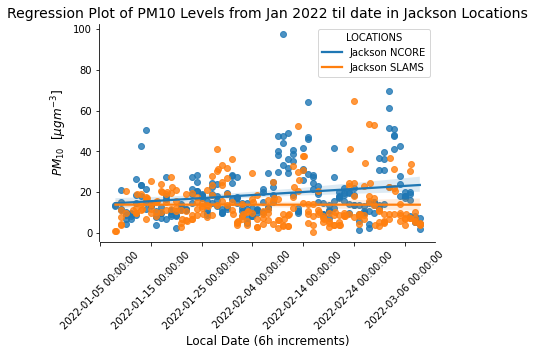

In [44]:
for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to 6 hour intervals
        _df = df.query("value >= 0.0").resample('6h').mean()
        xval = 'date_ordinal'
        yval = 'value'
        ax = sns.regplot(
            x = xval,
            y = yval,
            data=_df,
            )
# plot customisation  
ax.set_ylabel("$PM_{10}$  [$\mu g m^{-3}$]", fontsize=12)
ax.set_xlabel("Local Date (6h increments)", fontsize=12)
ax.set_title("Regression Plot of PM10 Levels from Jan 2022 til date in Jackson Locations",  fontsize=14)
sns.despine(offset=1)
plt.legend(labels=["Jackson NCORE","Jackson SLAMS"], title="LOCATIONS",loc="best", fontsize="medium", title_fontsize="10")
new_labels = [datetime.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plt.xticks(rotation = 45)
plt.show()